FOOD NUTRIENT ANALYSIS

A SUB-PROJECT "Nutrient Classification: Predicting Food Categories Based on Macronutrient Composition" USING DEEP-LEARNING
MODEL (MLP) BY MAUZUM SHAMIL

In [1]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv(r"C:\Users\dell\Desktop\food nutrient dataset.csv")

In [7]:
df

,ID,Description,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,1001,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,1002,"BUTTER,WHIPPED,WITH SALT",717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,1003,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,1004,"CHEESE,BLUE",353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,1005,"CHEESE,BRICK",371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,80200,"FROG LEGS,RAW",73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.00,18.0,1.50,285.0,0.0,1.00,0.2
7054,83110,"MACKEREL,SALTED",305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.00,66.0,1.40,520.0,0.0,2.38,25.2
7055,90240,"SCALLOP,(BAY&SEA),CKD,STMD",111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.00,10.0,0.58,314.0,0.0,0.00,0.0
7056,90560,"SNAIL,RAW",90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.00,10.0,3.50,382.0,0.0,5.00,0.0


In [8]:
df = df.drop(['ID','Description'],axis=1)

In [9]:
df

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.00,18.0,1.50,285.0,0.0,1.00,0.2
7054,305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.00,66.0,1.40,520.0,0.0,2.38,25.2
7055,111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.00,10.0,0.58,314.0,0.0,0.00,0.0
7056,90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.00,10.0,3.50,382.0,0.0,5.00,0.0


In [10]:
df.head()

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [11]:
df.tail()

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
7053,73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.0,18.0,1.50,285.0,0.0,1.00,0.2
7054,305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.0,66.0,1.40,520.0,0.0,2.38,25.2
7055,111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.0,10.0,0.58,314.0,0.0,0.00,0.0
7056,90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.0,10.0,3.50,382.0,0.0,5.00,0.0
7057,89.0,19.80,0.50,0.00,68.0,0.127,50.0,0.0,118.0,1.40,230.0,0.0,0.50,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Calories      7057 non-null   float64
 1   Protein       7057 non-null   float64
 2   TotalFat      7057 non-null   float64
 3   Carbohydrate  7057 non-null   float64
 4   Sodium        6974 non-null   float64
 5   SaturatedFat  6757 non-null   float64
 6   Cholesterol   6770 non-null   float64
 7   Sugar         5148 non-null   float64
 8   Calcium       6922 non-null   float64
 9   Iron          6935 non-null   float64
 10  Potassium     6649 non-null   float64
 11  VitaminC      6726 non-null   float64
 12  VitaminE      4338 non-null   float64
 13  VitaminD      4224 non-null   float64
dtypes: float64(14)
memory usage: 772.1 KB


In [13]:
df.columns

Index(['Calories', 'Protein', 'TotalFat', 'Carbohydrate', 'Sodium',
       'SaturatedFat', 'Cholesterol', 'Sugar', 'Calcium', 'Iron', 'Potassium',
       'VitaminC', 'VitaminE', 'VitaminD'],
      dtype='object')

In [14]:
df.dtypes

Calories        float64
Protein         float64
TotalFat        float64
Carbohydrate    float64
Sodium          float64
SaturatedFat    float64
Cholesterol     float64
Sugar           float64
Calcium         float64
Iron            float64
Potassium       float64
VitaminC        float64
VitaminE        float64
VitaminD        float64
dtype: object

In [15]:
df.corr()

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
Calories,1.000000,0.135258,0.807770,0.434701,0.033703,0.611601,0.032433,0.309989,0.112560,0.192506,0.078807,-0.029628,0.365777,0.095231
Protein,0.135258,1.000000,0.061682,-0.284500,-0.003253,0.045784,0.280578,-0.289221,0.041071,0.133609,0.225451,-0.067523,-0.057482,0.035705
TotalFat,0.807770,0.061682,1.000000,-0.109399,0.003390,0.766142,0.097111,-0.055459,0.006585,-0.051781,-0.052801,-0.059612,0.370318,0.100754
Carbohydrate,0.434701,-0.284500,-0.109399,1.000000,0.049544,-0.108676,-0.216070,0.688422,0.187122,0.362023,0.148615,0.093021,0.097550,-0.002758
Sodium,0.033703,-0.003253,0.003390,0.049544,1.000000,-0.005075,-0.018348,-0.007078,0.174784,0.027904,-0.009881,-0.013911,-0.002742,0.010261
SaturatedFat,0.611601,0.045784,0.766142,-0.108676,-0.005075,1.000000,0.096021,0.007981,0.024601,-0.068871,-0.068748,-0.046903,0.138286,0.062197
Cholesterol,0.032433,0.280578,0.097111,-0.216070,-0.018348,0.096021,1.000000,-0.165460,-0.033076,0.006832,-0.018960,-0.027659,-0.055091,0.153185
Sugar,0.309989,-0.289221,-0.055459,0.688422,-0.007078,0.007981,-0.165460,1.000000,0.105687,0.119691,0.024143,0.054862,0.035455,0.043342
Calcium,0.112560,0.041071,0.006585,0.187122,0.174784,0.024601,-0.033076,0.105687,1.000000,0.323955,0.246256,0.128239,0.121751,0.031684
Iron,0.192506,0.133609,-0.051781,0.362023,0.027904,-0.068871,0.006832,0.119691,0.323955,1.000000,0.216464,0.071911,0.216158,0.048567


<Axes: >

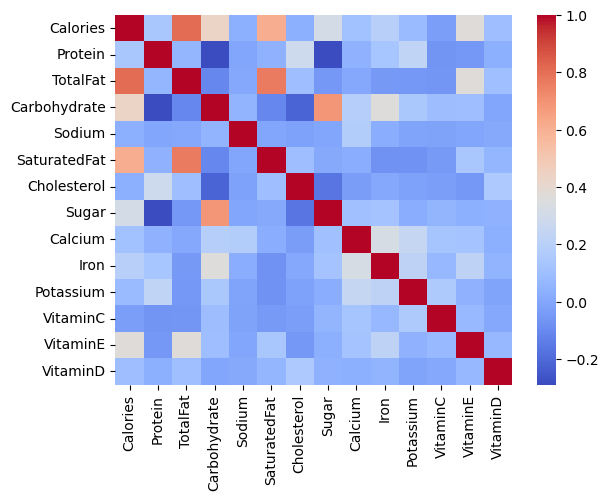

In [16]:
sns.heatmap(df.corr(),cmap='coolwarm')

#  Data preprocessing

In [17]:
# MISSING VALUES

df.isna().sum()

Calories           1
Protein            1
TotalFat           1
Carbohydrate       1
Sodium            84
SaturatedFat     301
Cholesterol      288
Sugar           1910
Calcium          136
Iron             123
Potassium        409
VitaminC         332
VitaminE        2720
VitaminD        2834
dtype: int64

array([[<Axes: title={'center': 'Calories'}>,
        <Axes: title={'center': 'Protein'}>,
        <Axes: title={'center': 'TotalFat'}>,
        <Axes: title={'center': 'Carbohydrate'}>],
       [<Axes: title={'center': 'Sodium'}>,
        <Axes: title={'center': 'SaturatedFat'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Sugar'}>],
       [<Axes: title={'center': 'Calcium'}>,
        <Axes: title={'center': 'Iron'}>,
        <Axes: title={'center': 'Potassium'}>,
        <Axes: title={'center': 'VitaminC'}>],
       [<Axes: title={'center': 'VitaminE'}>,
        <Axes: title={'center': 'VitaminD'}>, <Axes: >, <Axes: >]],
      dtype=object)

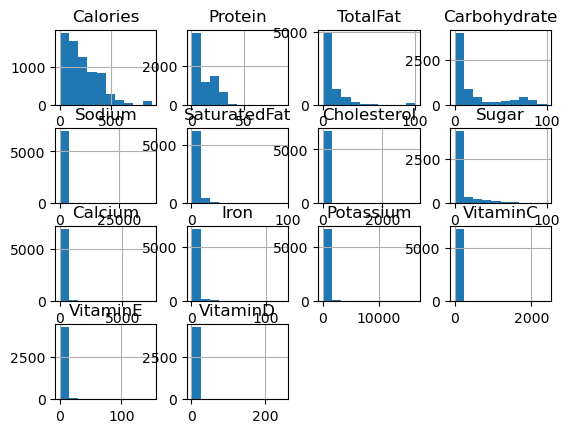

In [18]:
df.hist()

In [19]:
df.columns

Index(['Calories', 'Protein', 'TotalFat', 'Carbohydrate', 'Sodium',
       'SaturatedFat', 'Cholesterol', 'Sugar', 'Calcium', 'Iron', 'Potassium',
       'VitaminC', 'VitaminE', 'VitaminD'],
      dtype='object')

In [20]:
for i in ['Calories', 'Protein', 'TotalFat', 'Carbohydrate', 'Sodium',
       'SaturatedFat', 'Cholesterol', 'Sugar', 'Calcium', 'Iron', 'Potassium',
       'VitaminC', 'VitaminE', 'VitaminD']:
    df[i]=df[i].fillna(df[i].median())

In [22]:
df.isna().sum()

Calories        0
Protein         0
TotalFat        0
Carbohydrate    0
Sodium          0
SaturatedFat    0
Cholesterol     0
Sugar           0
Calcium         0
Iron            0
Potassium       0
VitaminC        0
VitaminE        0
VitaminD        0
dtype: int64

In [23]:
df

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7053,73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.00,18.0,1.50,285.0,0.0,1.00,0.2
7054,305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.00,66.0,1.40,520.0,0.0,2.38,25.2
7055,111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.00,10.0,0.58,314.0,0.0,0.00,0.0
7056,90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.00,10.0,3.50,382.0,0.0,5.00,0.0


# ADDING CATEGORY COLUMN

In [24]:
# create a function

def classify_food(row):
    if row['Protein'] >= 20:  # Threshold for high-protein foods
        return 'High-Protein'
    elif row['Carbohydrate'] >= 50:  # Threshold for high-carb foods
        return 'High-Carb'
    elif row['TotalFat'] >= 20:  # Threshold for high-fat foods
        return 'High-Fat'
    else:
        return 'Other'

In [25]:
# apply and create a column

df['Category'] = df.apply(classify_food, axis=1)

In [26]:
df.head()

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,Category
0,717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5,High-Fat
1,717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5,High-Fat
2,876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8,High-Fat
3,353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5,High-Protein
4,371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5,High-Protein


In [31]:
df[100:110]

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD,Category
100,339.0,11.73,0.54,73.45,968.0,0.342,3.0,73.450,2054.0,1.24,2289.0,0.9,0.00,0.0,High-Carb
101,27.0,0.85,0.36,5.14,54.0,0.230,2.0,5.140,47.0,0.06,161.0,0.1,0.00,0.0,Other
102,353.0,12.93,1.07,74.46,1079.0,0.684,6.0,74.460,796.0,0.88,2080.0,1.5,0.02,0.0,High-Carb
103,61.0,3.47,3.25,4.66,46.0,2.096,13.0,4.660,121.0,0.05,155.0,0.5,0.06,0.1,Other
104,63.0,5.25,1.55,7.04,70.0,1.000,6.0,7.040,183.0,0.08,234.0,0.8,0.03,0.0,Other
105,56.0,5.73,0.18,7.68,77.0,0.116,2.0,7.680,199.0,0.09,255.0,0.9,0.00,0.0,Other
106,85.0,4.93,1.25,13.80,66.0,0.806,5.0,13.800,171.0,0.07,219.0,0.8,0.02,0.0,Other
107,99.0,3.98,1.15,18.64,53.0,0.742,5.0,18.640,138.0,0.06,177.0,0.6,0.02,0.0,Other
108,102.0,4.37,1.08,19.05,58.0,0.697,4.0,19.050,152.0,0.07,195.0,0.7,0.02,0.0,Other
109,105.0,4.86,1.41,18.60,65.0,0.909,6.0,1.395,169.0,0.07,216.0,0.7,0.27,0.0,Other


In [27]:
df.Category.nunique()

4

# splitting and train_test

In [34]:
from sklearn.model_selection import train_test_split

In [33]:
x = df.drop('Category',axis=1)
y = df['Category']

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [39]:
y

array([1, 1, 1, ..., 2, 3, 3])

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train.shape

(5646, 14)

In [42]:
y_train.shape

(5646,)

In [44]:
x_test.shape

(1412, 14)

In [45]:
y_test.shape

(1412,)

# model building

In [46]:
from keras import Sequential
from keras.layers import Dense

In [49]:
# Define number of features and classes
num_features = x.shape[1]
num_classes = len(np.unique(y))

# Define the MLP model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [52]:
history = model.fit(x_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.7838 - val_accuracy: 0.7823 - val_loss: 0.9631
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.8967 - val_accuracy: 0.7912 - val_loss: 1.2630
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8481 - loss: 0.6550 - val_accuracy: 0.7867 - val_loss: 1.2759
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8310 - loss: 0.8286 - val_accuracy: 0.8407 - val_loss: 0.8754
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8342 - loss: 0.9370 - val_accuracy: 0.7637 - val_loss: 1.7237
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8175 - loss: 1.0569 - val_accuracy: 0.8292 - val_loss: 1.1491
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8505 - loss: 0.7407 - val_accuracy: 0.8531 - val_loss: 0.6819
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8720 - loss: 0.4349 - val_accuracy: 0.

# performance analysis

In [54]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9143 - loss: 0.5289
Test accuracy: 0.9072238206863403


# conclusion and prediction

Conclusion Report:

In this project, we aimed to classify food items into different nutrient categories based on their macronutrient composition using a Multi-Layer Perceptron (MLP) model. We followed the following steps:

Data Preparation:
We loaded the dataset containing information about food items, including features such as Calories, Protein, TotalFat, Carbohydrate, Sodium, SaturatedFat, Cholesterol, Sugar, Calcium, Iron, Potassium, VitaminC, VitaminE, and VitaminD.
We preprocessed the data, handling missing values and encoding categorical variables if necessary.
We defined the target variable by categorizing foods into high-protein, high-carb, high-fat, and other categories based on specified thresholds for macronutrient content.

Model Building and Training:
We built an MLP model using TensorFlow and Keras, consisting of two hidden layers with 64 neurons each and ReLU activation functions.
The output layer had softmax activation to classify foods into multiple nutrient categories.
We compiled the model with the Adam optimizer and sparse categorical cross-entropy loss function and trained it on the training data for 10 epochs.

Model Evaluation:
We evaluated the trained model on the test data and computed the test loss and accuracy.
The model achieved a test accuracy of approximately 90.72%.
Conclusion:

The MLP model demonstrated good performance in classifying food items into nutrient categories based on their macronutrient composition.
The achieved test accuracy indicates that the model can effectively generalize to unseen data.
The classification results can be valuable for individuals looking to make informed dietary choices based on their nutritional preferences and goals.

# prediction

In [57]:
x.head()

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
0,717.0,0.85,81.11,0.06,714.0,51.368,215.0,0.06,24.0,0.02,24.0,0.0,2.32,1.5
1,717.0,0.85,81.11,0.06,827.0,50.489,219.0,0.06,24.0,0.16,26.0,0.0,2.32,1.5
2,876.0,0.28,99.48,0.00,2.0,61.924,256.0,0.00,4.0,0.00,5.0,0.0,2.80,1.8
3,353.0,21.40,28.74,2.34,1395.0,18.669,75.0,0.50,528.0,0.31,256.0,0.0,0.25,0.5
4,371.0,23.24,29.68,2.79,560.0,18.764,94.0,0.51,674.0,0.43,136.0,0.0,0.26,0.5


In [61]:
x.tail()

,Calories,Protein,TotalFat,Carbohydrate,Sodium,SaturatedFat,Cholesterol,Sugar,Calcium,Iron,Potassium,VitaminC,VitaminE,VitaminD
7053,73.0,16.40,0.30,0.00,58.0,0.076,50.0,0.0,18.0,1.50,285.0,0.0,1.00,0.2
7054,305.0,18.50,25.10,0.00,4450.0,7.148,95.0,0.0,66.0,1.40,520.0,0.0,2.38,25.2
7055,111.0,20.54,0.84,5.41,667.0,0.218,41.0,0.0,10.0,0.58,314.0,0.0,0.00,0.0
7056,90.0,16.10,1.40,2.00,70.0,0.361,50.0,0.0,10.0,3.50,382.0,0.0,5.00,0.0
7057,89.0,19.80,0.50,0.00,68.0,0.127,50.0,0.0,118.0,1.40,230.0,0.0,0.50,0.0


In [60]:
input_data = np.array([[717.0	,0.85	,81.11	,0.06	,714.0	,51.368	,215.0	,0.06	,24.0	,0.02	,24.0	,0.0	,2.32	,1.5]])
predictions = model.predict(input_data)


# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode class labels if necessary (e.g., if using LabelEncoder)
predicted_labels = le.inverse_transform(predicted_labels)

# Display predicted labels
print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
['High-Fat']


In [62]:
input_data = np.array([[111.0	,20.54	,0.84	,5.41	,667.0	,0.218	,41.0	,0.0	,10.0	,0.58	,314.0	,0.0	,0.00	,0.0]])

predictions = model.predict(input_data)


# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode class labels if necessary (e.g., if using LabelEncoder)
predicted_labels = le.inverse_transform(predicted_labels)

# Display predicted labels
print(predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
['High-Protein']
